## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
complete_df = complete_df.rename(columns={"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen", "Weight (g)": "Weight_(g)", "Tumor Volume (mm3)": "Tumor_Volume_(mm3)", "Metastatic Sites":"Metastatic_Sites"})

# Display the data table for preview
complete_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
mousecount = len(complete_df['Mouse_ID'].unique())
print(mousecount)


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_entries = complete_df[complete_df.duplicated(['Mouse_ID', 'Timepoint'])]
duplicate_entries

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_entries


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df.drop_duplicates(subset=['Mouse_ID', 'Timepoint'])
clean_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)


1888

## Summary Statistics

In [13]:
#This method produces everything in a single groupby function
tumor_vol = clean_df.loc[:,['Drug_Regimen', 'Timepoint', 'Tumor_Volume_(mm3)']]
tumor_vol


,Drug_Regimen,Timepoint,Tumor_Volume_(mm3)
0,Ramicane,0,45.000000
1,Ramicane,5,38.825898
2,Ramicane,10,35.014271
3,Ramicane,15,34.223992
4,Ramicane,20,32.997729
...,...,...,...
1888,Naftisol,25,63.145652
1889,Naftisol,30,65.841013
1890,Naftisol,35,69.176246
1891,Naftisol,40,70.314904


In [17]:
summary_1 = tumor_vol.groupby(['Drug_Regimen', 'Timepoint']).agg({"Tumor_Volume_(mm3)" :["mean", "median", "var", "sem", "std"]})
summary_1

Tumor_Volume_(mm3)                                  \
                                     mean     median        var       sem   
Drug_Regimen Timepoint                                                      
Capomulin    0                  45.000000  45.000000   0.000000  0.000000   
             5                  44.266086  45.597064   5.030889  0.448593   
             10                 43.084291  43.421014  12.344133  0.702684   
             15                 42.064317  42.798160  16.878693  0.838617   
             20                 40.716325  40.716428  19.035028  0.909731   
...                                   ...        ...        ...       ...   
Zoniferol    25                 55.432935  55.676604   5.808348  0.602513   
             30                 57.713531  57.419744   9.601024  0.800043   
             35                 60.089372  60.365832  10.876760  0.881426   
             40                 62.916692  62.274543  13.958456  0.998515   
             45                 65.960888  65.684689  14.100301  1.003576   

                                  
                             std  
Drug_Regimen Timepoint            
Capomulin    0          0.000000  
             5          2.242964  
             10         3.513422  
             15         4.108369  
             20         4.362915  
...                          ...  
Zoniferol    25         2.410052  
             30         3.098552  
             35         3.297993  
             40         3.736102  
             45         3.755037  

[100 rows x 5 columns]

In [22]:
#this method uses separate series and then combines them

#creating framework for stats df
summary_2 = pd.DataFrame(clean_df.groupby(["Drug_Regimen", "Timepoint"]).count())
summary_2 = summary_2.drop(['Mouse_ID', 'Tumor_Volume_(mm3)', 'Sex', "Age_months", "Weight_(g)", "Metastatic_Sites"], axis=1)

summary_2
                                       

Empty DataFrame
Columns: []
Index: [(Capomulin, 0), (Capomulin, 5), (Capomulin, 10), (Capomulin, 15), (Capomulin, 20), (Capomulin, 25), (Capomulin, 30), (Capomulin, 35), (Capomulin, 40), (Capomulin, 45), (Ceftamin, 0), (Ceftamin, 5), (Ceftamin, 10), (Ceftamin, 15), (Ceftamin, 20), (Ceftamin, 25), (Ceftamin, 30), (Ceftamin, 35), (Ceftamin, 40), (Ceftamin, 45), (Infubinol, 0), (Infubinol, 5), (Infubinol, 10), (Infubinol, 15), (Infubinol, 20), (Infubinol, 25), (Infubinol, 30), (Infubinol, 35), (Infubinol, 40), (Infubinol, 45), (Ketapril, 0), (Ketapril, 5), (Ketapril, 10), (Ketapril, 15), (Ketapril, 20), (Ketapril, 25), (Ketapril, 30), (Ketapril, 35), (Ketapril, 40), (Ketapril, 45), (Naftisol, 0), (Naftisol, 5), (Naftisol, 10), (Naftisol, 15), (Naftisol, 20), (Naftisol, 25), (Naftisol, 30), (Naftisol, 35), (Naftisol, 40), (Naftisol, 45), (Placebo, 0), (Placebo, 5), (Placebo, 10), (Placebo, 15), (Placebo, 20), (Placebo, 25), (Placebo, 30), (Placebo, 35), (Placebo, 40), (Placebo, 45), (Propriva, 0), (Propriva, 5), (Propriva, 10), (Propriva, 15), (Propriva, 20), (Propriva, 25), (Propriva, 30), (Propriva, 35), (Propriva, 40), (Propriva, 45), (Ramicane, 0), (Ramicane, 5), (Ramicane, 10), (Ramicane, 15), (Ramicane, 20), (Ramicane, 25), (Ramicane, 30), (Ramicane, 35), (Ramicane, 40), (Ramicane, 45), (Stelasyn, 0), (Stelasyn, 5), (Stelasyn, 10), (Stelasyn, 15), (Stelasyn, 20), (Stelasyn, 25), (Stelasyn, 30), (Stelasyn, 35), (Stelasyn, 40), (Stelasyn, 45), (Zoniferol, 0), (Zoniferol, 5), (Zoniferol, 10), (Zoniferol, 15), (Zoniferol, 20), (Zoniferol, 25), (Zoniferol, 30), (Zoniferol, 35), (Zoniferol, 40), (Zoniferol, 45)]

[100 rows x 0 columns]

In [23]:
#creating dataframes for merging
mean = clean_df.groupby(['Drug_Regimen', 'Timepoint']).mean()['Tumor_Volume_(mm3)']
std = clean_df.groupby(['Drug_Regimen', 'Timepoint']).std()['Tumor_Volume_(mm3)']
var = clean_df.groupby(['Drug_Regimen', 'Timepoint']).var()['Tumor_Volume_(mm3)']
sem = clean_df.groupby(['Drug_Regimen', 'Timepoint']).sem()['Tumor_Volume_(mm3)']
median = clean_df.groupby(['Drug_Regimen', 'Timepoint']).median()['Tumor_Volume_(mm3)']

In [24]:
summary_2['mean'] = mean
summary_2['median'] = median
summary_2['var'] = var
summary_2['sem'] = sem
summary_2['std'] = std
summary_2

mean     median        var       sem       std
Drug_Regimen Timepoint                                                     
Capomulin    0          45.000000  45.000000   0.000000  0.000000  0.000000
             5          44.266086  45.597064   5.030889  0.448593  2.242964
             10         43.084291  43.421014  12.344133  0.702684  3.513422
             15         42.064317  42.798160  16.878693  0.838617  4.108369
             20         40.716325  40.716428  19.035028  0.909731  4.362915
...                           ...        ...        ...       ...       ...
Zoniferol    25         55.432935  55.676604   5.808348  0.602513  2.410052
             30         57.713531  57.419744   9.601024  0.800043  3.098552
             35         60.089372  60.365832  10.876760  0.881426  3.297993
             40         62.916692  62.274543  13.958456  0.998515  3.736102
             45         65.960888  65.684689  14.100301  1.003576  3.755037

[100 rows x 5 columns]

## Bar and Pie Charts

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_df = clean_df.groupby(['Timepoint', 'Drug_Regimen']).count()
count_df = count_df.drop(['Weight_(g)', 'Metastatic_Sites', 'Tumor_Volume_(mm3)', 'Sex', 'Age_months'], axis=1)

count_df.rename(columns={"Mouse_ID": "Mouse Count"})
count_df


Mouse_ID
Timepoint Drug_Regimen          
0         Capomulin           25
          Ceftamin            25
          Infubinol           25
          Ketapril            25
          Naftisol            25
...                          ...
45        Placebo             11
          Propriva             7
          Ramicane            20
          Stelasyn            11
          Zoniferol           14

[100 rows x 1 columns]

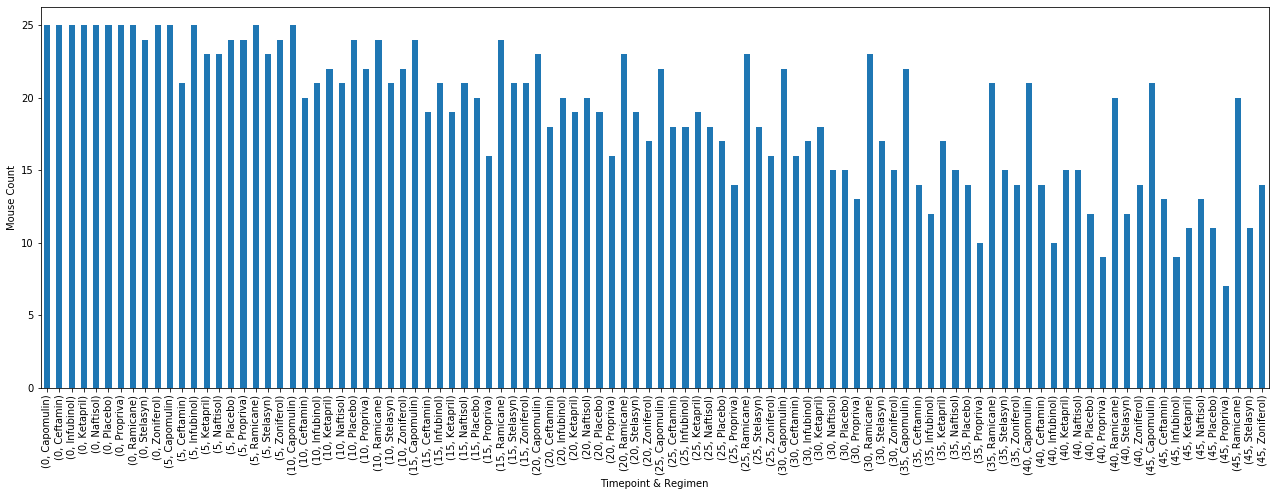

In [71]:
# Create a bar chart based off of the group series from before
count_chart = count_df.plot(kind='bar', legend=False, figsize=(22,7))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Timepoint & Regimen")
count_chart.set_ylabel("Mouse Count")


plt.show()


In [74]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

##couldn't get to this in time

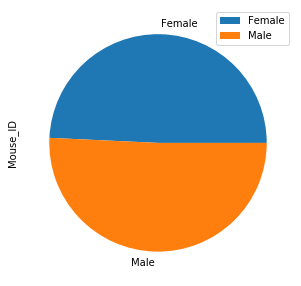

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_df = pd.DataFrame(clean_df.groupby(["Sex"]).count())
sex_df

sex_df = sex_df.drop(['Timepoint', 'Drug_Regimen', 'Weight_(g)', 'Metastatic_Sites', 'Tumor_Volume_(mm3)', 'Age_months'], axis=1)
sex_df

sex_plot = sex_df.plot.pie(y='Mouse_ID', figsize=(5, 5))

In [27]:
sex_df

,Mouse_ID
Sex,
Female,930
Male,958


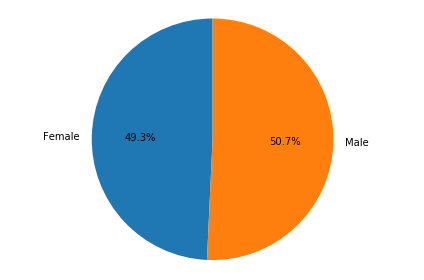

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
plt.pie(
    # using the sex dataframe
    sex_df['Mouse_ID'],
    # with the labels being series defined above
    labels=labels,
    # with no shadows
    shadow=False,
   
    
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = clean_df.groupby(["Mouse_ID"]) ["Timepoint"].max()

grouped_df = grouped_df.reset_index()
grouped_df


,Mouse_ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

grouped_df = pd.merge(grouped_df, clean_df, how="left", on=["Mouse_ID", 'Timepoint'])
grouped_df



,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight_(g),Tumor_Volume_(mm3),Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
#"cric" meaning 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'
cric = grouped_df[grouped_df['Drug_Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
cric


,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight_(g),Tumor_Volume_(mm3),Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [32]:
cric_cap = grouped_df[grouped_df['Drug_Regimen'].isin(['Capomulin'])]
cric_ram = grouped_df[grouped_df['Drug_Regimen'].isin(['Ramicane'])]
cric_inf = grouped_df[grouped_df['Drug_Regimen'].isin(['Infubinol'])]
cric_cef = grouped_df[grouped_df['Drug_Regimen'].isin(['Ceftamin'])]
cap_list = cric_cap['Tumor_Volume_(mm3)'].to_list()
ram_list = cric_ram['Tumor_Volume_(mm3)'].to_list()
inf_list = cric_inf['Tumor_Volume_(mm3)'].to_list()
cef_list = cric_cef['Tumor_Volume_(mm3)'].to_list()
cap_list.sort()
ram_list.sort()
inf_list.sort()
cef_list.sort()

In [33]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list = cric['Drug_Regimen']['Tumor_Volume_(mm3)'].to_list()

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = ()
# We need to sort the data to determine which could be outliers

tumor_list = cric['Tumor_Volume_(mm3)'].to_list()

tumor_list.sort()


In [34]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

# If the data is in a dataframe, we use pandas to give quartile calculations



quartiles = cric['Tumor_Volume_(mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Print a filtered dataframe of any outliers
outliers = cric.loc[(cric['Tumor_Volume_(mm3)'] > upper_bound) | (cric['Tumor_Volume_(mm3)'] < lower_bound), :]
outliers

#there are no outliers
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volumes is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight_(g),Tumor_Volume_(mm3),Metastatic_Sites


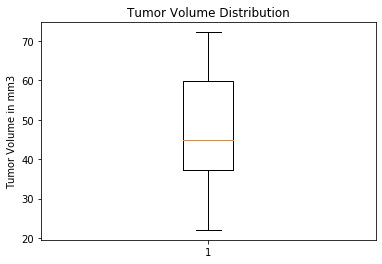

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#for all regimens
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution')
ax1.set_ylabel('Tumor Volume in mm3')
ax1.boxplot(tumor_list)
plt.show()

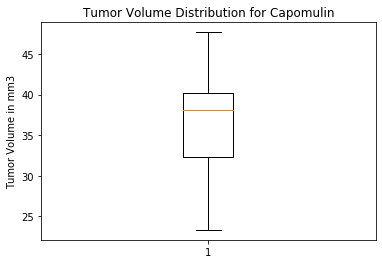

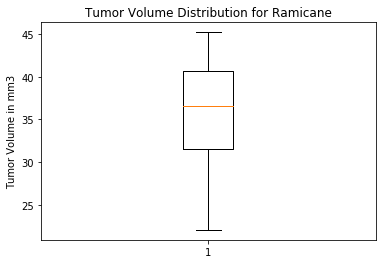

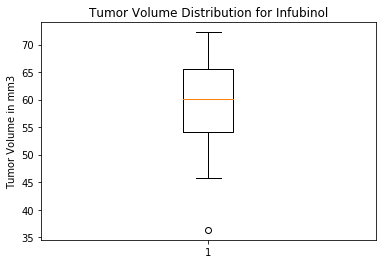

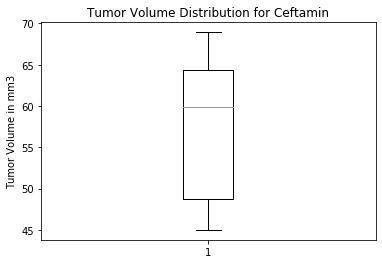

In [36]:
#for each regimen 
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution for Capomulin')
ax1.set_ylabel('Tumor Volume in mm3')
ax1.boxplot(cap_list)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution for Ramicane')
ax1.set_ylabel('Tumor Volume in mm3')
ax1.boxplot(ram_list)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution for Infubinol')
ax1.set_ylabel('Tumor Volume in mm3')
ax1.boxplot(inf_list)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution for Ceftamin')
ax1.set_ylabel('Tumor Volume in mm3')
ax1.boxplot(cef_list)
plt.show()

## Line and Scatter Plots

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin = clean_df[['Drug_Regimen', 'Timepoint','Tumor_Volume_(mm3)']]
capomulin = capomulin[capomulin['Drug_Regimen'].isin(['Capomulin'])]
capomulin


,Drug_Regimen,Timepoint,Tumor_Volume_(mm3)
10,Capomulin,0,45.000000
11,Capomulin,5,43.878496
12,Capomulin,10,37.614948
13,Capomulin,15,38.177232
14,Capomulin,20,36.866876
...,...,...,...
440,Capomulin,45,47.685963
1452,Capomulin,0,45.000000
1453,Capomulin,5,45.597064
1454,Capomulin,10,46.059608


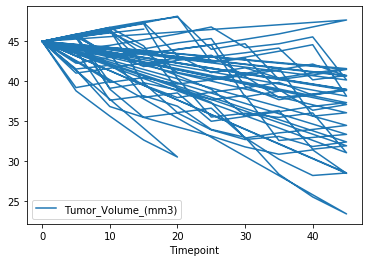

In [39]:
capomulin.plot(kind='line',x='Timepoint',y='Tumor_Volume_(mm3)')


plt.show()


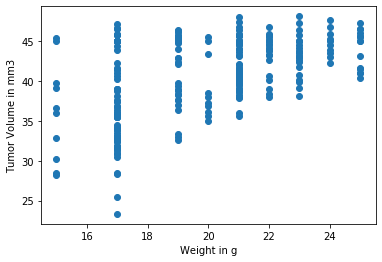

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = clean_df[['Drug_Regimen', 'Timepoint','Tumor_Volume_(mm3)', 'Weight_(g)']]
capomulin = capomulin[capomulin['Drug_Regimen'].isin(['Capomulin'])]
capomulin

x_values = capomulin['Weight_(g)']
y_values = capomulin['Tumor_Volume_(mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight in g')
plt.ylabel('Tumor Volume in mm3')
plt.show()


## Correlation and Regression

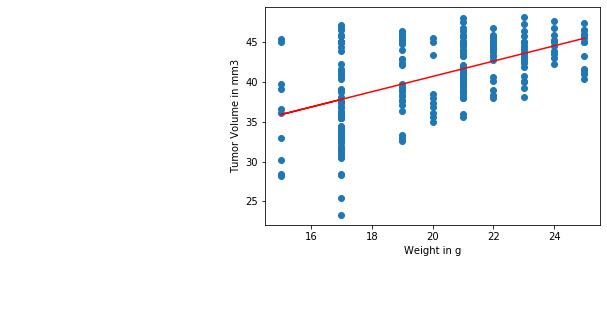

The r-squared is: 0.2763600223455911


In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = capomulin['Weight_(g)']
y_values = capomulin['Tumor_Volume_(mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in g')
plt.ylabel('Tumor Volume in mm3')
plt.show()
print(f"The r-squared is: {rvalue**2}")